# Решающие деревья. Домашнее задание

## Что нужно сделать
Решите задачу классификации оттоковых клиентов телекома: для каждого клиента необходимо определить, перестанет он пользоваться услугами оператора в ближайшее время или нет.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("telecom_churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Сделайте первичную обработку данных:

1. Выбросите колонку State.

2. Колонки International plan и Voice mail plan закодируйте следующим образом: Yes замените на 1, а No на 0.

3. Переведите целевую переменную (Churn) в числа: True в 1, а False в 0.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
Area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
Number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
Total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
Total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
Total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
Total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
Total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
Total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
Total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


In [4]:
df.drop('State', axis=1, inplace=True)

In [10]:
def to_numeric(data):
    return 1 if data == 'Yes' else 0


df['Churn'] = df['Churn'].astype(int)
df['International plan'] = df['International plan'].apply(to_numeric)
df['Voice mail plan'] = df['Voice mail plan'].apply(to_numeric)

Выведите на экран первые строки изменённой таблицы, чтобы проверить, что все преобразования сработали.

In [11]:
# ваш код здесь
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Создайте матрицу объект-признак X и вектор с целевой переменной (Churn) y.

In [12]:
# ваш код здесь
X = df.drop('Churn', axis=1)
y = df['Churn']

Проверьте баланс классов. Является ли выборка сбалансированной?

<Axes: ylabel='Target'>

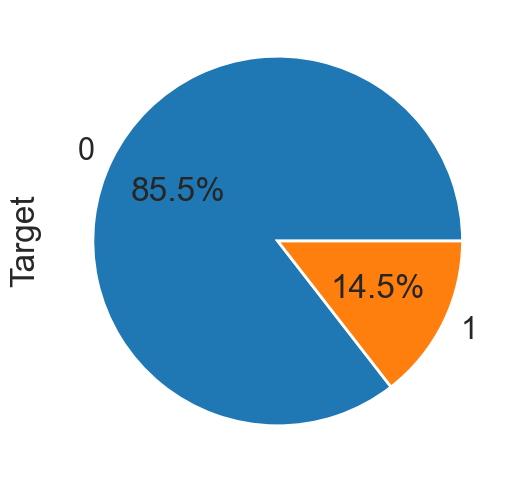

In [13]:
# ваш код здесь
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
sns.set_context('poster')
plt.rcParams['figure.figsize'] = [8,6]
df.groupby('Churn').size().plot(kind='pie',
                                       y = "target",
                                       label = "Target",
                                       autopct='%1.1f%%')

Разбейте данные на тренировочную и тестовую части, размер тестовой части — 30%.

In [14]:
from sklearn.model_selection import train_test_split

# ваш код здесь
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Для линейных моделей очень важно масштабирование признаков. Поэтому отмасштабируйте признаки при помощи [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), обучив метод на тренировочных данных и применив его и к трейну, и к тесту.

In [15]:
from sklearn.preprocessing import StandardScaler

X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

После масштабирования признаков X_train и X_test перестали быть объектами типа pd.DataFrame, это неудобно. Приведите их снова к pd.DataFrame.

In [16]:
# ваш код здесь
X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)

Обучите на тренировочных данных с параметрами по умолчанию:

1) логистическую регрессию;

2) метод опорных векторов (с kernel='linear').

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import f1_score

lg = LogisticRegression()
lg.fit(X_train_scaled, y_train)
y_train_pred_lg = lg.predict(X_train_scaled)
y_test_pred_lg = lg.predict(X_test_scaled)
print(f'f1 score train: {f1_score(y_train, y_train_pred_lg)}')
print(f'f1 score test: {f1_score(y_test, y_test_pred_lg)}')

f1 score train: 0.2987012987012987
f1 score test: 0.3163265306122449


In [21]:
svc = SVC(kernel='linear')
svc.fit(X_train_scaled, y_train)
y_train_pred_svc = svc.predict(X_train_scaled)
y_test_pred_svc = svc.predict(X_test_scaled)
print(f'f1 score train: {f1_score(y_train, y_train_pred_svc)}')
print(f'f1 score test: {f1_score(y_test, y_test_pred_svc)}')

f1 score train: 0.0
f1 score test: 0.0


С помощью обученных моделей сделайте предсказание на тестовых данных.

In [23]:
from sklearn.metrics import roc_auc_score

print(f'roc-auc score test logistic regression: {roc_auc_score(y_test, y_test_pred_lg)}')
print(f'roc-auc score test svc model: {roc_auc_score(y_test, y_test_pred_svc)}')

roc-auc score test logistic regression: 0.5952006452913894
roc-auc score test svc model: 0.5


Теперь обучите решающее дерево с параметрами по умолчанию на тренировочных данных, сделайте предсказание на тесте. Используйте метрику для оценки.

In [25]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)
y_train_pred_dt = dt.predict(X_train_scaled)
y_test_pred_dt = dt.predict(X_test_scaled)
print(f'f1 score train: {f1_score(y_train, y_train_pred_dt)}')
print(f'f1 score test: {f1_score(y_test, y_test_pred_dt)}')
print(f'roc-auc score decision tree: {roc_auc_score(y_test, y_test_pred_dt)}')

f1 score train: 1.0
f1 score test: 0.6941580756013745
roc-auc score decision tree: 0.8219600725952813


Нужно ли масшабировать признаки для обучения решающего дерева? Проверьте это, заново разбив данные на тренировочную и тестовую части (назовите новые полученные объекты новыми названиями), и проведите обучение, предсказание и оценку метрики до масштабирования и после.

In [29]:
dt_unscaled = DecisionTreeClassifier()
dt_unscaled.fit(X_train, y_train)
y_train_pred_dt_unscaled = dt_unscaled.predict(X_train)
y_test_pred_dt_unscaled = dt_unscaled.predict(X_test)
print(f'f1 score train: {f1_score(y_train, y_train_pred_dt_unscaled)}')
print(f'f1 score test: {f1_score(y_test, y_test_pred_dt_unscaled)}')
print(f'roc-auc score decision tree unscaled: {roc_auc_score(y_test, y_test_pred_dt_unscaled)}')

f1 score train: 1.0
f1 score test: 0.7046263345195729
roc-auc score decision tree unscaled: 0.8197418834442428


Какая модель справилась с решением задачи?

Таким образом, для решения данной задачи классификации мы получили следующие результаты:
- roc-auc score модели логистической регрессии на тестовых данных = 0.595;
- roc-auc score метода опорных векторов на тестовых данных = 0.5, то есть метод опорных векторов не подъодит для решения данной задачи;
- roc-auc score дерева решений на тестовых данных = 0.822, при этом качество модели дерева решений остается одинаковым, как на модели построенной на масштабированных признаках. так и на модели построенной без масштабирования признаков. Таким образом масштабировать признаки в данной задачи не обязательно.